In [28]:
import cmake

In [29]:
import dlib

In [30]:
import numpy as np

In [31]:
!pip install face-recognition

In [32]:
import face_recognition

In [33]:
import cv2

[True] [0.43015977]


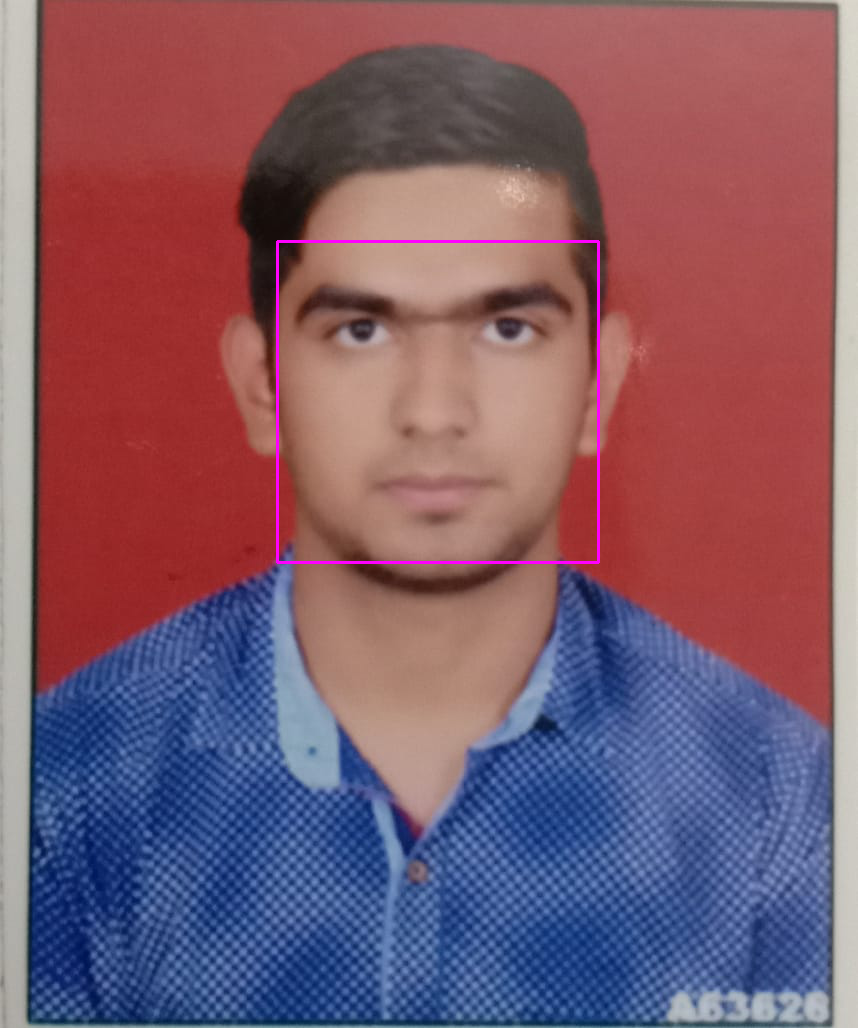

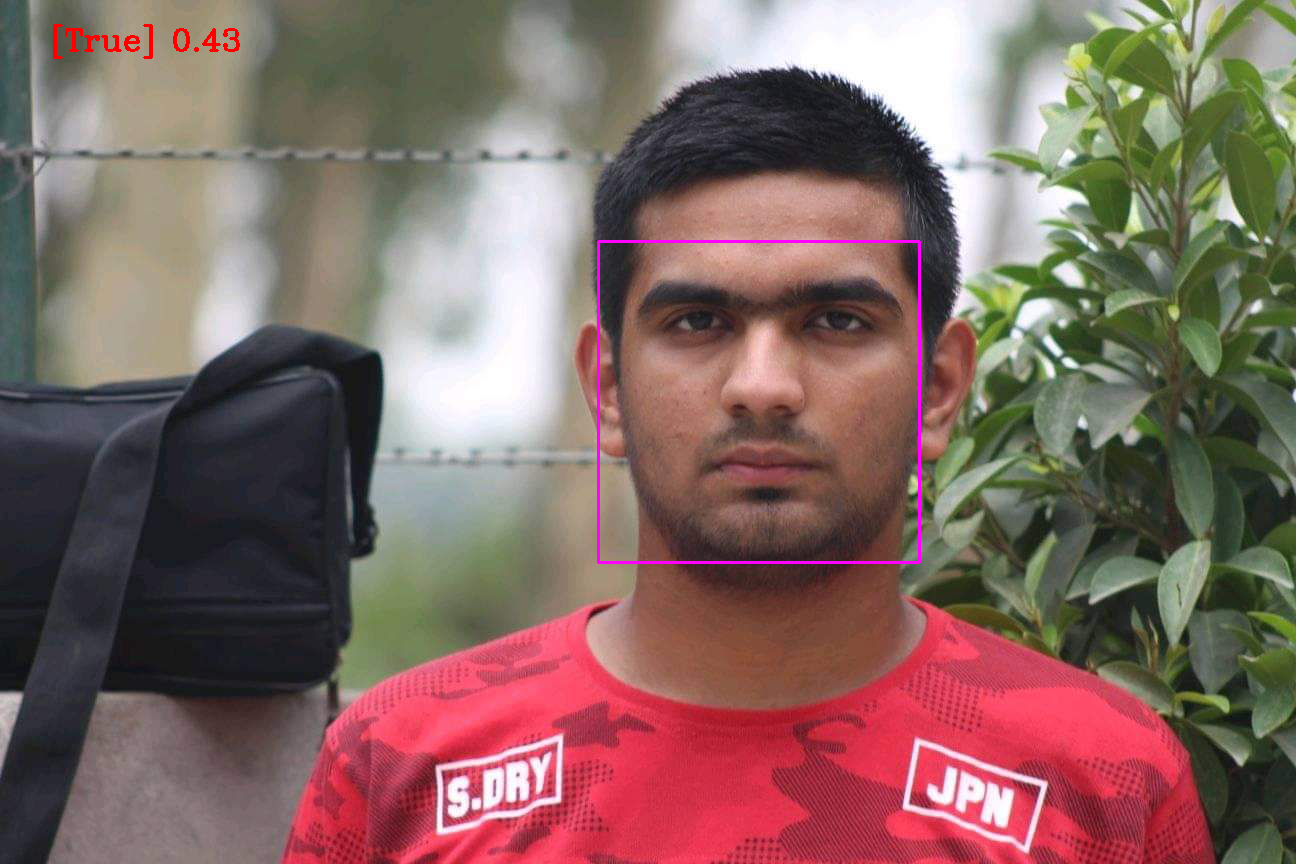

In [38]:
from google.colab.patches import cv2_imshow
imgharsh = face_recognition.load_image_file('harsh.jpg')
imgharsh=cv2.cvtColor(imgharsh,cv2.COLOR_BGR2RGB)
imgtest = face_recognition.load_image_file('harshtest.jpg')
imgtest=cv2.cvtColor(imgtest,cv2.COLOR_BGR2RGB)

faceLoc = face_recognition.face_locations(imgharsh)[0]
encodeharsh=face_recognition.face_encodings(imgharsh)[0]
cv2.rectangle(imgharsh,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)

faceLocTest = face_recognition.face_locations(imgtest)[0]
encodetest=face_recognition.face_encodings(imgtest)[0]
cv2.rectangle(imgtest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2)

results=face_recognition.compare_faces([encodeharsh],encodetest)
facedist=face_recognition.face_distance([encodeharsh],encodetest)
print(results,facedist)
cv2.putText(imgtest,f'{results} {round(facedist[0],2)}' , (50,50), cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)

cv2_imshow(imgharsh)
cv2_imshow(imgtest)


[False] [0.64387052]


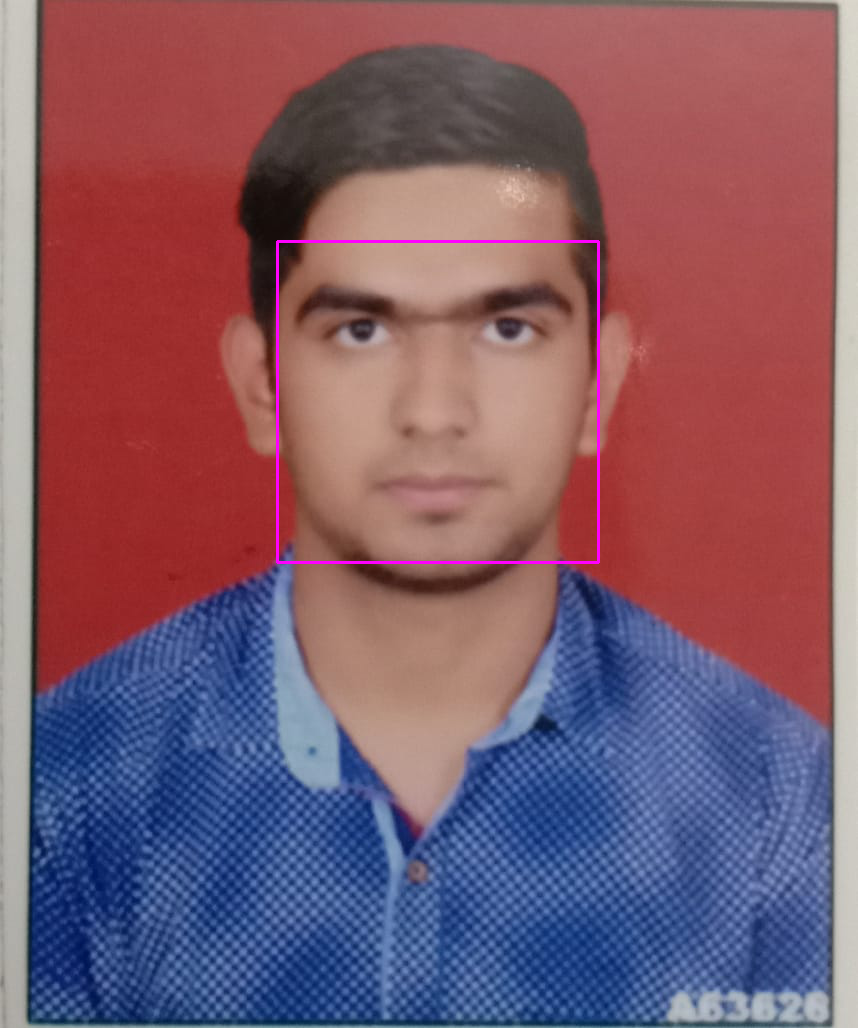

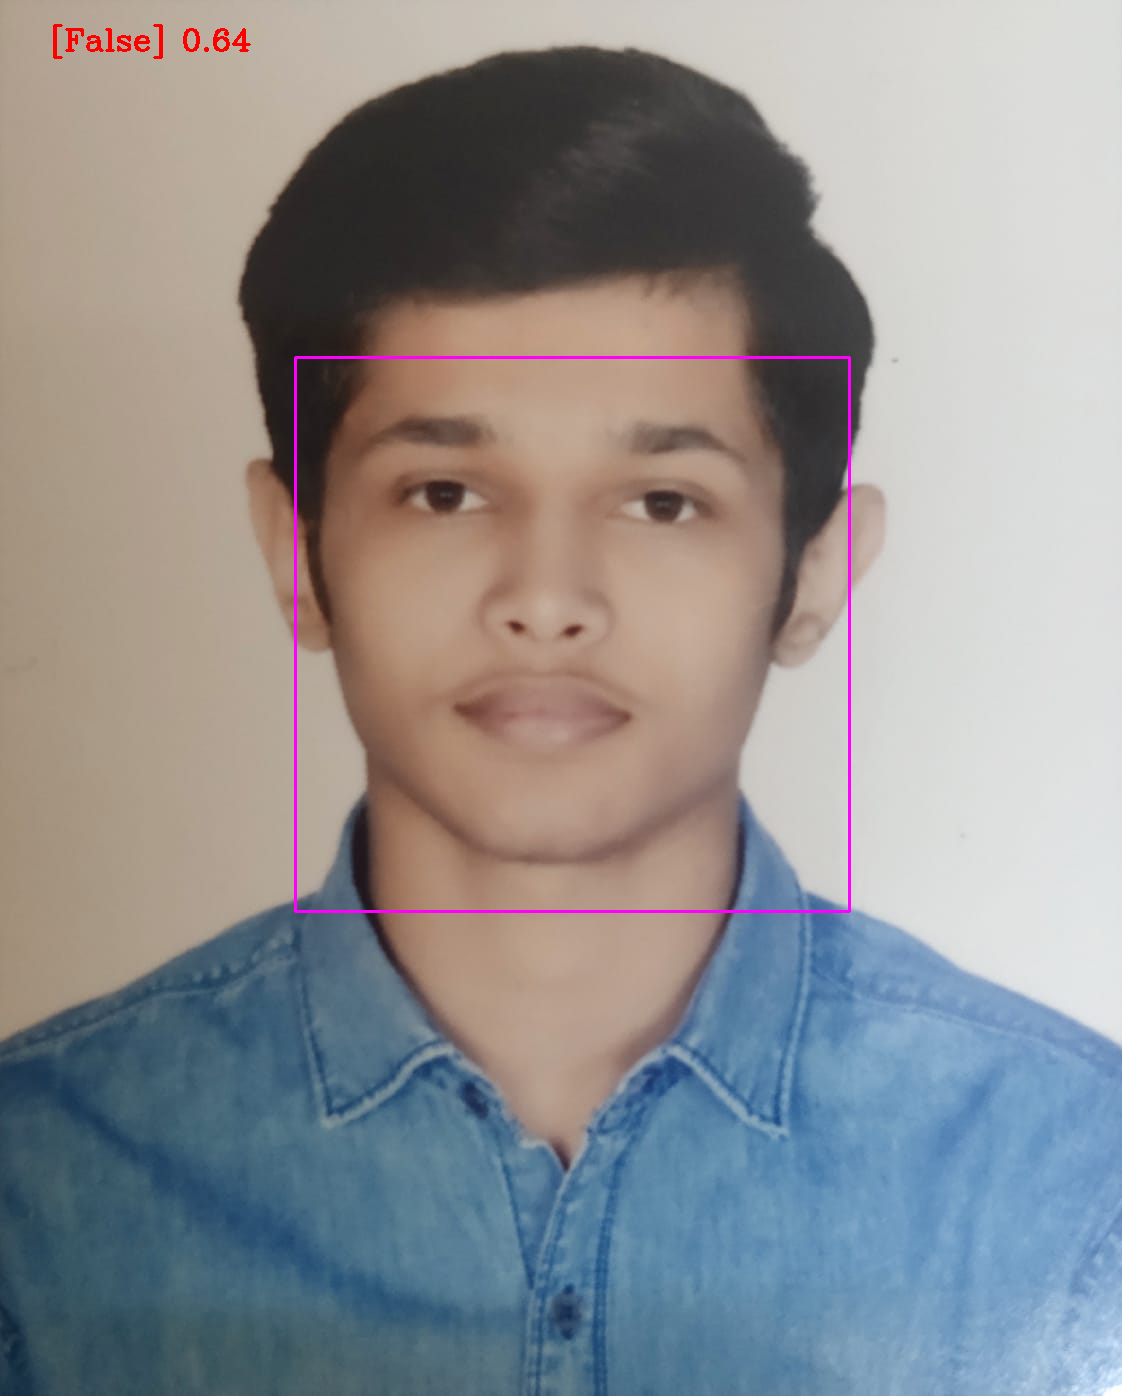

In [39]:
from google.colab.patches import cv2_imshow
imgharsh = face_recognition.load_image_file('harsh.jpg')
imgharsh=cv2.cvtColor(imgharsh,cv2.COLOR_BGR2RGB)
imgtest = face_recognition.load_image_file('chirag.jpg')
imgtest=cv2.cvtColor(imgtest,cv2.COLOR_BGR2RGB)

faceLoc = face_recognition.face_locations(imgharsh)[0]
encodeharsh=face_recognition.face_encodings(imgharsh)[0]
cv2.rectangle(imgharsh,(faceLoc[3],faceLoc[0]),(faceLoc[1],faceLoc[2]),(255,0,255),2)

faceLocTest = face_recognition.face_locations(imgtest)[0]
encodetest=face_recognition.face_encodings(imgtest)[0]
cv2.rectangle(imgtest,(faceLocTest[3],faceLocTest[0]),(faceLocTest[1],faceLocTest[2]),(255,0,255),2)

results=face_recognition.compare_faces([encodeharsh],encodetest)
facedist=face_recognition.face_distance([encodeharsh],encodetest)
print(results,facedist)
cv2.putText(imgtest,f'{results} {round(facedist[0],2)}' , (50,50), cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)

cv2_imshow(imgharsh)
cv2_imshow(imgtest)

In [40]:
import os

In [46]:
path = 'ImagesAttendance'
images = []
classNames = []
myList = os.listdir(path)
myList.remove('.ipynb_checkpoints')
print(myList)

['vinay.jpg', 'chirag.jpg', 'harsh.jpg']


In [56]:
for cl in myList:
  curimg = cv2.imread(f'{path}/{cl}')
  images.append(curimg)
  classNames.append(os.path.splitext(cl)[0])
print(classNames)

['vinay', 'chirag', 'harsh', 'vinay', 'chirag', 'harsh']


In [81]:
def findEncodings(images):
  encodeList=[]
  for img in images:
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    encode=face_recognition.face_encodings(img)[0]
    encodeList.append(encode)
  return encodeList
from datetime import datetime
def markAttendance(name):
  with open('Attendance.csv','r+') as f:
    myDataList = f.readlines()
    nameList=[]
    for line in myDataList:
      entry = line.split(',')
      nameList.append(entry[0])
    if name not in nameList:
      now = datetime.now()
      dtstring = now.strftime('%H:%M:%S')
      f.writelines(f'\n{name},{dtstring}')



encodeListknown = findEncodings(images)
print('Encoding Complete')

Encoding Complete


In [79]:
cap= cv2.VideoCapture(0)

while True:
  success, img = cap.read()
  imgs = cv2.resize(img,(0,0),None,0.25,0.25)
  imgs = cv2.cvtColor(imgs,cv2.COLOR_BGR2RGB)

  facesCurFrame = face_recognition.face_locations(imgs)
  encodesCurFrame=face_recognition.face_encodings(imgs,facesCurFrame)

  for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
    matches=face_recognition.compare_faces(encodeListknown,encodeFace)
    faceDis=face_recognition.face_distance(encodeListknown,encodeFace) 
    #print(faceDis)
    matchIndex = np.argmin(faceDis)


    if matches[matchIndex]:
      name = classNames[matchIndex].upper()
      #print(name)
      y1,x2,y2,x1 = faceLoc
      y1,x2,y2,x1=y1*4,x2*4,y2*4,x1*4
      cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
      cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
      cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
      markAttendance(name)


  cv2.imshow('webcam',img)
  cv2.waitkey(1)


error: ignored